In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np 
from torch.utils.data import DataLoader
import torchvision
import torch.nn.functional as F

In [2]:
mnist_train=torchvision.datasets.MNIST(root='./mnist_train_data',train=True,download=True,transform=torchvision.transforms.ToTensor())
mnist_test=torchvision.datasets.MNIST(root='./mnist_test_data',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [3]:
train_loader=DataLoader(mnist_train,batch_size=64)
test_loader=DataLoader(mnist_test,batch_size=64)

In [ ]:
for b,ex in enumerate(train_loader):
    break

In [4]:
dat_f=nn.Flatten()
df=dat_f(ex[0])

NameError: name 'ex' is not defined

In [5]:
class mnist_convnet(nn.Module):
    def __init__(self):
        super(mnist_convnet,self).__init__()
        self.conv1=nn.Conv2d(1,6,(3,3),1) # no padding
        self.conv2=nn.Conv2d(6,16,(3,3),1) # no padding
        self.flat=nn.Flatten()
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,60)
        self.fc3=nn.Linear(60,10)
    def forward(self,X):
        l1=F.relu(self.conv1(X))
        p1=F.max_pool2d(l1,(2,2))
        l2=F.relu(self.conv2(p1))
        p2=F.max_pool2d(l2,(2,2))
        xf=self.flat(p2)
        d1=F.relu(self.fc1(xf))
        d2=F.relu(self.fc2(d1))
        d3=self.fc3(d2)
        return(d3)


In [7]:
torch.manual_seed(42)
model=mnist_convnet()
model

mnist_convnet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

In [8]:
crit=nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters())

In [15]:
for batch,ex in enumerate(train_loader):
    break

In [9]:
def train_single_epoch(d_loader,mod,opt,crit,disp_int=100):
    loss_val=[]
    for batch,ex in enumerate(d_loader):
        opt.zero_grad()
        pred=mod.forward(ex[0])
        loss=crit(pred,ex[1])
        loss_val.append(loss.item())
        loss.backward()
        opt.step()
        if(batch%disp_int==0):
            print(f'Batch:{batch} Loss:{loss_val[batch]:0.4f}')
    return(loss_val,mod)

def train_model(num_epochs,data_loader,mod,crit_func,disp_int=100):
    
    epoch_mean_loss=[]
    epoch_raw_loss=[]
    for epoch in range(num_epochs):
        print(f'___________________Epoch:{epoch}________________________')
        epoch_loss, model=train_single_epoch(data_loader,mod,opt,crit_func,disp_int)
        epoch_mean_loss.append(np.mean(epoch_loss))
        epoch_raw_loss.extend(epoch_loss)
    return(model,epoch_raw_loss,epoch_mean_loss)



___________________Epoch:0________________________
Batch:0 Loss:2.3145
Batch:100 Loss:0.6791
Batch:200 Loss:0.2565
Batch:300 Loss:0.3721
Batch:400 Loss:0.1779
Batch:500 Loss:0.1987
Batch:600 Loss:0.1979
Batch:700 Loss:0.2548
Batch:800 Loss:0.2340
Batch:900 Loss:0.2297
___________________Epoch:1________________________
Batch:0 Loss:0.0959
Batch:100 Loss:0.1331
Batch:200 Loss:0.0740
Batch:300 Loss:0.2014
Batch:400 Loss:0.0536
Batch:500 Loss:0.1183
Batch:600 Loss:0.1009
Batch:700 Loss:0.0879
Batch:800 Loss:0.2098
Batch:900 Loss:0.1873
___________________Epoch:2________________________
Batch:0 Loss:0.0574
Batch:100 Loss:0.1192
Batch:200 Loss:0.0388
Batch:300 Loss:0.1430
Batch:400 Loss:0.0168
Batch:500 Loss:0.0685
Batch:600 Loss:0.0744
Batch:700 Loss:0.0866
Batch:800 Loss:0.1520
Batch:900 Loss:0.1420
___________________Epoch:3________________________
Batch:0 Loss:0.0254
Batch:100 Loss:0.0962
Batch:200 Loss:0.0404
Batch:300 Loss:0.0666
Batch:400 Loss:0.0259
Batch:500 Loss:0.0367
Batch:600 Lo

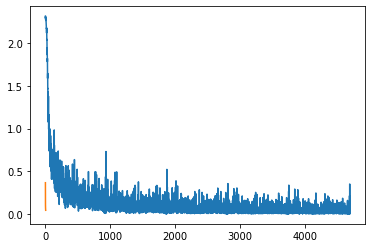

In [9]:
plt.plot(epoch_raw_loss)
plt.plot(epoch_mean_loss)

In [17]:
for batch,ex in enumerate(test_loader):
    break

In [25]:
cm=model.forward(ex[0])
torch.softmax(cm,1)

tensor([[1.9523e-09, 2.1383e-08, 2.8311e-07, 1.4206e-07, 3.9173e-11, 1.2904e-10,
         8.3582e-15, 1.0000e+00, 3.5944e-10, 9.6380e-07],
        [2.4459e-08, 1.6127e-04, 9.9984e-01, 1.1337e-07, 2.7062e-11, 8.0033e-11,
         2.0839e-10, 9.8751e-10, 9.1764e-08, 3.2992e-12],
        [1.7329e-06, 9.9992e-01, 2.0961e-06, 3.8348e-09, 3.7111e-05, 1.8677e-07,
         2.0446e-07, 3.4806e-05, 5.6919e-06, 2.6021e-06],
        [9.9999e-01, 2.0401e-08, 8.9940e-07, 1.4524e-09, 1.2920e-08, 8.4213e-07,
         3.5984e-06, 8.2771e-08, 3.3773e-08, 1.9614e-06],
        [5.2386e-06, 1.1565e-07, 4.8247e-06, 2.8788e-07, 9.9911e-01, 1.2142e-05,
         1.8930e-07, 1.9551e-06, 3.2208e-06, 8.6517e-04],
        [1.5534e-07, 9.9999e-01, 1.0664e-07, 8.5683e-11, 4.6242e-06, 1.6358e-09,
         1.8611e-09, 8.5087e-06, 1.0059e-06, 4.1868e-07],
        [4.1028e-09, 4.6897e-07, 2.2777e-08, 7.7415e-07, 9.9757e-01, 2.4933e-05,
         5.3899e-09, 2.0621e-05, 9.6169e-04, 1.4215e-03],
        [1.1030e-09, 2.6808

In [34]:
def eval_model(test_loader):

    pred_lab=[]
    pred_prob=[]
    true_lab=[]
    with torch.no_grad():
        for batch,ex in enumerate(test_loader):
            t_p=model.forward(ex[0])
            t_p_prob=np.max(torch.softmax(t_p,1).detach().numpy(),axis=1)
            t_p_lab=np.argmax(torch.softmax(t_p,1).detach().numpy(),axis=1)
            pred_prob.extend(t_p_prob)
            pred_lab.extend(t_p_lab)
            true_lab.extend(ex[1].detach().numpy())
    return pred_prob,pred_lab,true_lab


In [35]:
pred_prob,pred_lab,true_lab=eval_model(test_loader)

In [37]:
def confusion_mat(pred_lab,true_lab,num_classes,disp_flag=0):
    cm=np.zeros([num_classes,num_classes])
    k=0
    for i in range(len(pred_lab)):
        cm[true_lab[k],pred_lab[k]]+=1
        k+=1
    if(disp_flag==1):
        print(cm)
    return(cm)


In [38]:
confusion_mat(pred_lab,true_lab,10)

array([[9.740e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00],
       [0.000e+00, 1.132e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 1.026e+03, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 1.004e+03, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 9.660e+02, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+01],
       [2.000e+00, 0.000e+00, 1.000e+00, 8.000e+00, 0.000e+00, 8.760e+02,
        0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00],
       [9.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.900e+01,
        9.120e+02, 0.000e+00, 3.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.016e+03, 1.000e+